In [79]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [81]:
sigmoid = lambda z :1/ (1 + np.exp(-z))

In [82]:
theta = np.zeros(X.shape[1])
z = np.dot(X, theta)
h = sigmoid(z)

In [83]:
loss = lambda h, y : (-y * np.log(h) - (h - y) * np.log(1 - h)).mean()

In [84]:
gradient = np.dot(X.T, (h - y)) / y.shape[0]

In [85]:
lr = 0.01
theta -= lr * gradient

In [86]:
predict_probs = lambda X, theta : sigmoid(np.dot(X, theta))

predict = lambda X, theta, threshold=0.5 :  gradient_probs(X, theta) >= threshold

# Logistic Regression Scratch

In [93]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr=lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis = 1)
    
    __sigmoid = lambda self, z : 1 / (1 + np.exp(-z))
    
    
    __loss = lambda self, h, y : (-y * np.log(h) - (1 - y) * np.log(1 - y)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            if(self.verbose == True and i% 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self,__loss(h. y)} \t')
            
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        return self.__sigmoid(np.dot(X, self.theta))
    
    predict = lambda self, X, threshold=0.5 : self.predict_prob(X) >= threshold

In [95]:
model = LogisticRegression(lr=0.01, num_iter=100000)
%time model.fit(X, y)

preds = model.predict(X)
# accuracy
(preds == y).mean()

CPU times: user 1.27 s, sys: 6.99 ms, total: 1.28 s
Wall time: 1.3 s


1.0

In [96]:
model.theta

array([-47.50324304,  19.99988251, -19.22987348])

In [97]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

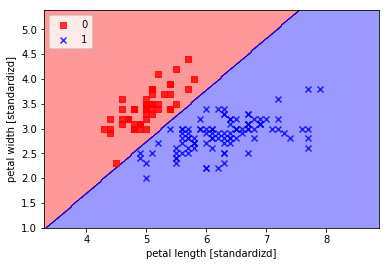

In [98]:
# 決定境界を出力
plot_decision_regions(X, y, model)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")
plt.legend(loc = "upper left")
plt.show()